In [43]:
import numpy as np         
import os                  
import random 
import matplotlib.pyplot as plt
 
import cv2
TRAIN_DIR = 'C:/Users/Raj/Desktop/New folder/training_set/training_set'
TEST_DIR = 'C:/Users/Raj/Desktop/New folder/test_set/test_set'
IMG_SIZE = 50
LR = 1e-3

In [44]:
category=['cats','dogs']
    

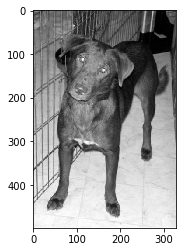

In [45]:
datadir='C:/Users/Raj/Desktop/New folder/training_set/training_set'
category=['dogs','cats']
for i in category:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break  

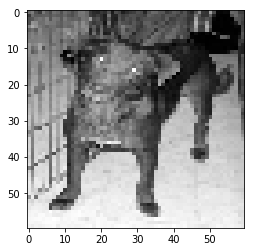

In [46]:
IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_CUBIC)
plt.imshow(new_array,cmap='gray')
plt.show()

In [47]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(TRAIN_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


In [48]:
training_data

[[array([[111, 122,  81, ...,  95,  66,  65],
         [ 65, 109,  92, ..., 103,  80,  72],
         [ 85,  89, 107, ...,  84,  83,  69],
         ...,
         [247, 248, 250, ..., 236, 234, 227],
         [247, 246, 244, ..., 236, 225, 228],
         [242, 237, 243, ..., 240, 237, 232]], dtype=uint8), 0],
 [array([[114,  99,  99, ..., 122, 122, 121],
         [ 79, 102, 123, ..., 123, 121, 123],
         [129, 119, 130, ..., 123, 122, 119],
         ...,
         [203, 202, 199, ...,  96,  95,  97],
         [204, 196, 194, ...,  93,  97,  97],
         [201, 197, 202, ...,  93,  92,  93]], dtype=uint8), 0],
 [array([[187, 184, 180, ...,  33,  34,  37],
         [183, 181, 185, ...,  42,  36,  41],
         [184, 180, 184, ...,  80,  47,  25],
         ...,
         [171, 172, 174, ...,  72,  62,  68],
         [151, 157, 173, ...,  58,  61,  70],
         [167, 155, 149, ...,  62,  60,  66]], dtype=uint8), 0],
 [array([[ 14,   7,   7, ..., 149, 134, 165],
         [ 32,  46,  38, ..

In [49]:
len(training_data)

8005

In [50]:
import random
random.shuffle(training_data)

In [52]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
0
1
1


In [53]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(TEST_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [54]:
testing_data

[[array([[ 44,  33,  60, ..., 135, 149, 146],
         [155, 114, 115, ..., 135, 152, 148],
         [100,  37,  60, ..., 141, 153, 148],
         ...,
         [128, 132, 134, ..., 142, 140, 140],
         [131, 129, 132, ..., 139, 150, 147],
         [126, 123, 128, ..., 142, 150, 141]], dtype=uint8), 0],
 [array([[ 25,  23,  23, ...,  44,  41,  28],
         [ 24,  25,  23, ...,  43,  42,  27],
         [ 24,  23,  24, ...,  43,  41,  28],
         ...,
         [143, 119, 127, ...,  27,  28,  26],
         [ 96, 110,  73, ...,  28,  28,  26],
         [ 80, 157, 154, ...,  28,  28,  27]], dtype=uint8), 0],
 [array([[ 7,  7,  7, ...,  2,  5,  1],
         [ 7,  7,  7, ...,  2,  4,  3],
         [ 7,  7,  7, ..., 12,  6,  9],
         ...,
         [27, 19, 22, ..., 20,  7, 18],
         [25, 28, 24, ..., 26, 19, 16],
         [18, 21, 20, ..., 17, 16, 10]], dtype=uint8), 0],
 [array([[112,  35, 161, ...,  49,  30,  27],
         [ 99,  74,  37, ...,  50,  19,  23],
         [ 49,  3

In [55]:
import random
random.shuffle(testing_data)

In [56]:
for sample in testing_data[:10]:
    print(sample[1])

0
0
1
1
1
0
1
0
1
0


In [57]:
X=[]
y=[]

In [58]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [60]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [63]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [64]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
X=X/255.0

In [68]:
y=np.array(y,dtype=np.uint8)
y

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [70]:
model.fit(X,y,validation_split=0.3,epochs=10)

Train on 5603 samples, validate on 2402 samples
Epoch 1/10
5603/5603 [==============================] - 55s 10ms/sample - loss: 0.6883 - accuracy: 0.5436 - val_loss: 0.6781 - val_accuracy: 0.6132
Epoch 2/10
5603/5603 [==============================] - 56s 10ms/sample - loss: 0.6800 - accuracy: 0.5681 - val_loss: 0.6689 - val_accuracy: 0.6216
Epoch 3/10
5603/5603 [==============================] - 56s 10ms/sample - loss: 0.6563 - accuracy: 0.6120 - val_loss: 0.6273 - val_accuracy: 0.6411
Epoch 4/10
5603/5603 [==============================] - 55s 10ms/sample - loss: 0.6281 - accuracy: 0.6550 - val_loss: 0.5943 - val_accuracy: 0.6936
Epoch 5/10
5603/5603 [==============================] - 56s 10ms/sample - loss: 0.5900 - accuracy: 0.6934 - val_loss: 0.5805 - val_accuracy: 0.7082
Epoch 6/10
5603/5603 [==============================] - 55s 10ms/sample - loss: 0.5509 - accuracy: 0.7196 - val_loss: 0.5460 - val_accuracy: 0.7223
Epoch 7/10
5603/5603 [==============================] - 55s 10ms

In [71]:
def prepare(filepath):
    img_size=60
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size))
    return np.array(new_array).reshape(-1,img_size,img_size,1)

In [72]:
a=prepare('meow.jpg')
a=a/255
a

array([[[[0.16862745],
         [0.16470588],
         [0.14509804],
         ...,
         [0.3254902 ],
         [0.39607843],
         [0.76078431]],

        [[0.15686275],
         [0.15686275],
         [0.1372549 ],
         ...,
         [0.4       ],
         [0.35686275],
         [0.75294118]],

        [[0.15294118],
         [0.15686275],
         [0.21960784],
         ...,
         [0.36470588],
         [0.38431373],
         [0.79215686]],

        ...,

        [[0.09411765],
         [0.08627451],
         [0.09019608],
         ...,
         [0.22745098],
         [0.36862745],
         [0.19215686]],

        [[0.08235294],
         [0.07843137],
         [0.09019608],
         ...,
         [0.14901961],
         [0.32941176],
         [0.23137255]],

        [[0.09803922],
         [0.09411765],
         [0.09019608],
         ...,
         [0.31764706],
         [0.33333333],
         [0.10588235]]]])

In [73]:
pred=model.predict([a])
pred

array([[0.9396467]], dtype=float32)

In [74]:
model.predict_classes([a])

array([[1]])

In [75]:
b=prepare('dog.jpg')
b=b/255.0
b

array([[[[0.42745098],
         [0.40392157],
         [0.39607843],
         ...,
         [0.69019608],
         [0.65490196],
         [0.62745098]],

        [[0.43529412],
         [0.40784314],
         [0.4       ],
         ...,
         [0.61176471],
         [0.58823529],
         [0.56470588]],

        [[0.43137255],
         [0.40784314],
         [0.39607843],
         ...,
         [0.56470588],
         [0.55686275],
         [0.55686275]],

        ...,

        [[0.43137255],
         [0.42745098],
         [0.41568627],
         ...,
         [0.61176471],
         [0.61960784],
         [0.62352941]],

        [[0.43137255],
         [0.42745098],
         [0.42352941],
         ...,
         [0.63137255],
         [0.60392157],
         [0.61176471]],

        [[0.42352941],
         [0.42745098],
         [0.43137255],
         ...,
         [0.62745098],
         [0.60392157],
         [0.61568627]]]])

In [76]:
model.predict([b])

array([[0.21016988]], dtype=float32)

In [77]:
model.predict_classes([b])

array([[0]])

In [96]:
len(testing_data)

2023

In [103]:
x1=[]
y1=[]

In [104]:
for features,label in testing_data:
    x1.append(features)
    y1.append(label)

In [109]:
x1=np.array(x1).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x1

array([[[[ 30],
         [ 23],
         [119],
         ...,
         [  7],
         [ 11],
         [ 12]],

        [[ 16],
         [ 18],
         [ 28],
         ...,
         [ 15],
         [  8],
         [ 11]],

        [[ 11],
         [ 25],
         [ 16],
         ...,
         [ 20],
         [ 23],
         [ 13]],

        ...,

        [[125],
         [132],
         [ 95],
         ...,
         [132],
         [142],
         [104]],

        [[ 51],
         [120],
         [130],
         ...,
         [108],
         [164],
         [175]],

        [[ 88],
         [121],
         [137],
         ...,
         [162],
         [ 97],
         [183]]],


       [[[ 62],
         [101],
         [ 50],
         ...,
         [ 70],
         [ 21],
         [ 38]],

        [[ 64],
         [ 62],
         [ 81],
         ...,
         [ 66],
         [ 69],
         [ 11]],

        [[ 60],
         [ 51],
         [ 67],
         ...,
         [ 83],
         [

In [106]:
y1=np.array(y1,dtype=np.uint8)
y1

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [111]:
x1=x1/255.0

In [114]:
model.predict_classes(x1)

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [115]:
y1[:5]

array([0, 0, 1, 1, 1], dtype=uint8)

In [116]:
model.predict_classes(x1[:5])

array([[0],
       [1],
       [0],
       [1],
       [1]])